In [45]:

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import StandardScaler

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from pandas_profiling import ProfileReport
from datetime import datetime


# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


In [46]:
from sklearn.datasets import load_boston

boston = load_boston()
print(f"Number of Data points: {boston.data.shape[0]}")
o_bytes = boston.data.nbytes
print(f"Data nbytes: {o_bytes}")

Number of Data points: 506
Data nbytes: 52624


* 데이터 전처리 *-> train dataset만 보고 파악할 수 있음.*
    * text -> 숫자 
    * 빠진거 채우기
    * 등...

**그렇기 때문에 데이터 로딩을 한 후에 바로 train과 test dataset으로 나눠야함.**

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(boston.data,boston.target,test_size=0.2,random_state=42)

In [48]:
pd_train = pd.DataFrame(x_train, columns=boston.feature_names)
pd_train["PRICE"] = y_train

print('\033[0m\033[94m*' * 21)
print('\033[94m\033[1m'+'.: Train Dataset :.')
print('\033[0m\033[94m*' * 21)
pd_train.head().style.background_gradient(cmap="Greens").set_properties(**{'font-family': 'Segoe UI'}).hide_index()

*********************
.: Train Dataset :.
*********************


CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
15.023400,0.000000,18.100000,0.000000,0.614000,5.304000,97.300000,2.100700,24.000000,666.000000,20.200000,349.480000,24.910000,12.000000
0.627390,0.000000,8.140000,0.000000,0.538000,5.834000,56.500000,4.498600,4.000000,307.000000,21.000000,395.620000,8.470000,19.900000
0.034660,35.000000,6.060000,0.000000,0.437900,6.031000,23.300000,6.640700,1.000000,304.000000,16.900000,362.250000,7.830000,19.400000
7.050420,0.000000,18.100000,0.000000,0.614000,6.103000,85.100000,2.021800,24.000000,666.000000,20.200000,2.520000,23.290000,13.400000
0.725800,0.000000,8.140000,0.000000,0.538000,5.727000,69.500000,3.796500,4.000000,307.000000,21.000000,390.950000,11.280000,18.200000


In [49]:
pd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  PRICE    404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [50]:
ProfileReport(pd_train, title='Dataset', minimal=True, progress_bar=False, 
              samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True,
              notebook={'iframe':{'height': '600px'}},
              html={'style':{'primary_color': '#219EBC'}},
              missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

**Boston Dataset에 대한 column을 이해하기 위해서 검색함**

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

> There are 14 attributes in each case of the dataset. They are:
> <ul>
>    <li> CRIM - per capita crime rate by town </li>
>    <li> ZN - proportion of residential land zoned for lots over 25,000 sq.ft.</li>
>    <li> INDUS - proportion of non-retail business acres per town. </li>
>    <li> CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) </li>
>    <li> NOX - nitric oxides concentration (parts per 10 million) </li>
>    <li> RM - average number of rooms per dwelling </li>
>    <li> AGE - proportion of owner-occupied units built prior to 1940 </li>
>    <li> DIS - weighted distances to five Boston employment centres</li>
>    <li> RAD - index of accessibility to radial highways</li>
>    <li> TAX - full-value property-tax rate per $10,000</li>
>    <li> PTRATIO - pupil-teacher ratio by town  </li>
>    <li> B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  </li>
>    <li> LSTAT - % lower status of the population  </li>
>    <li> MEDV - Median value of owner-occupied homes in $1000's  </li>
> </ul>

**그래서 `ZN`이랑 `CHAS`가  각각 값이 0이 많은 이유는 합당하다.** 

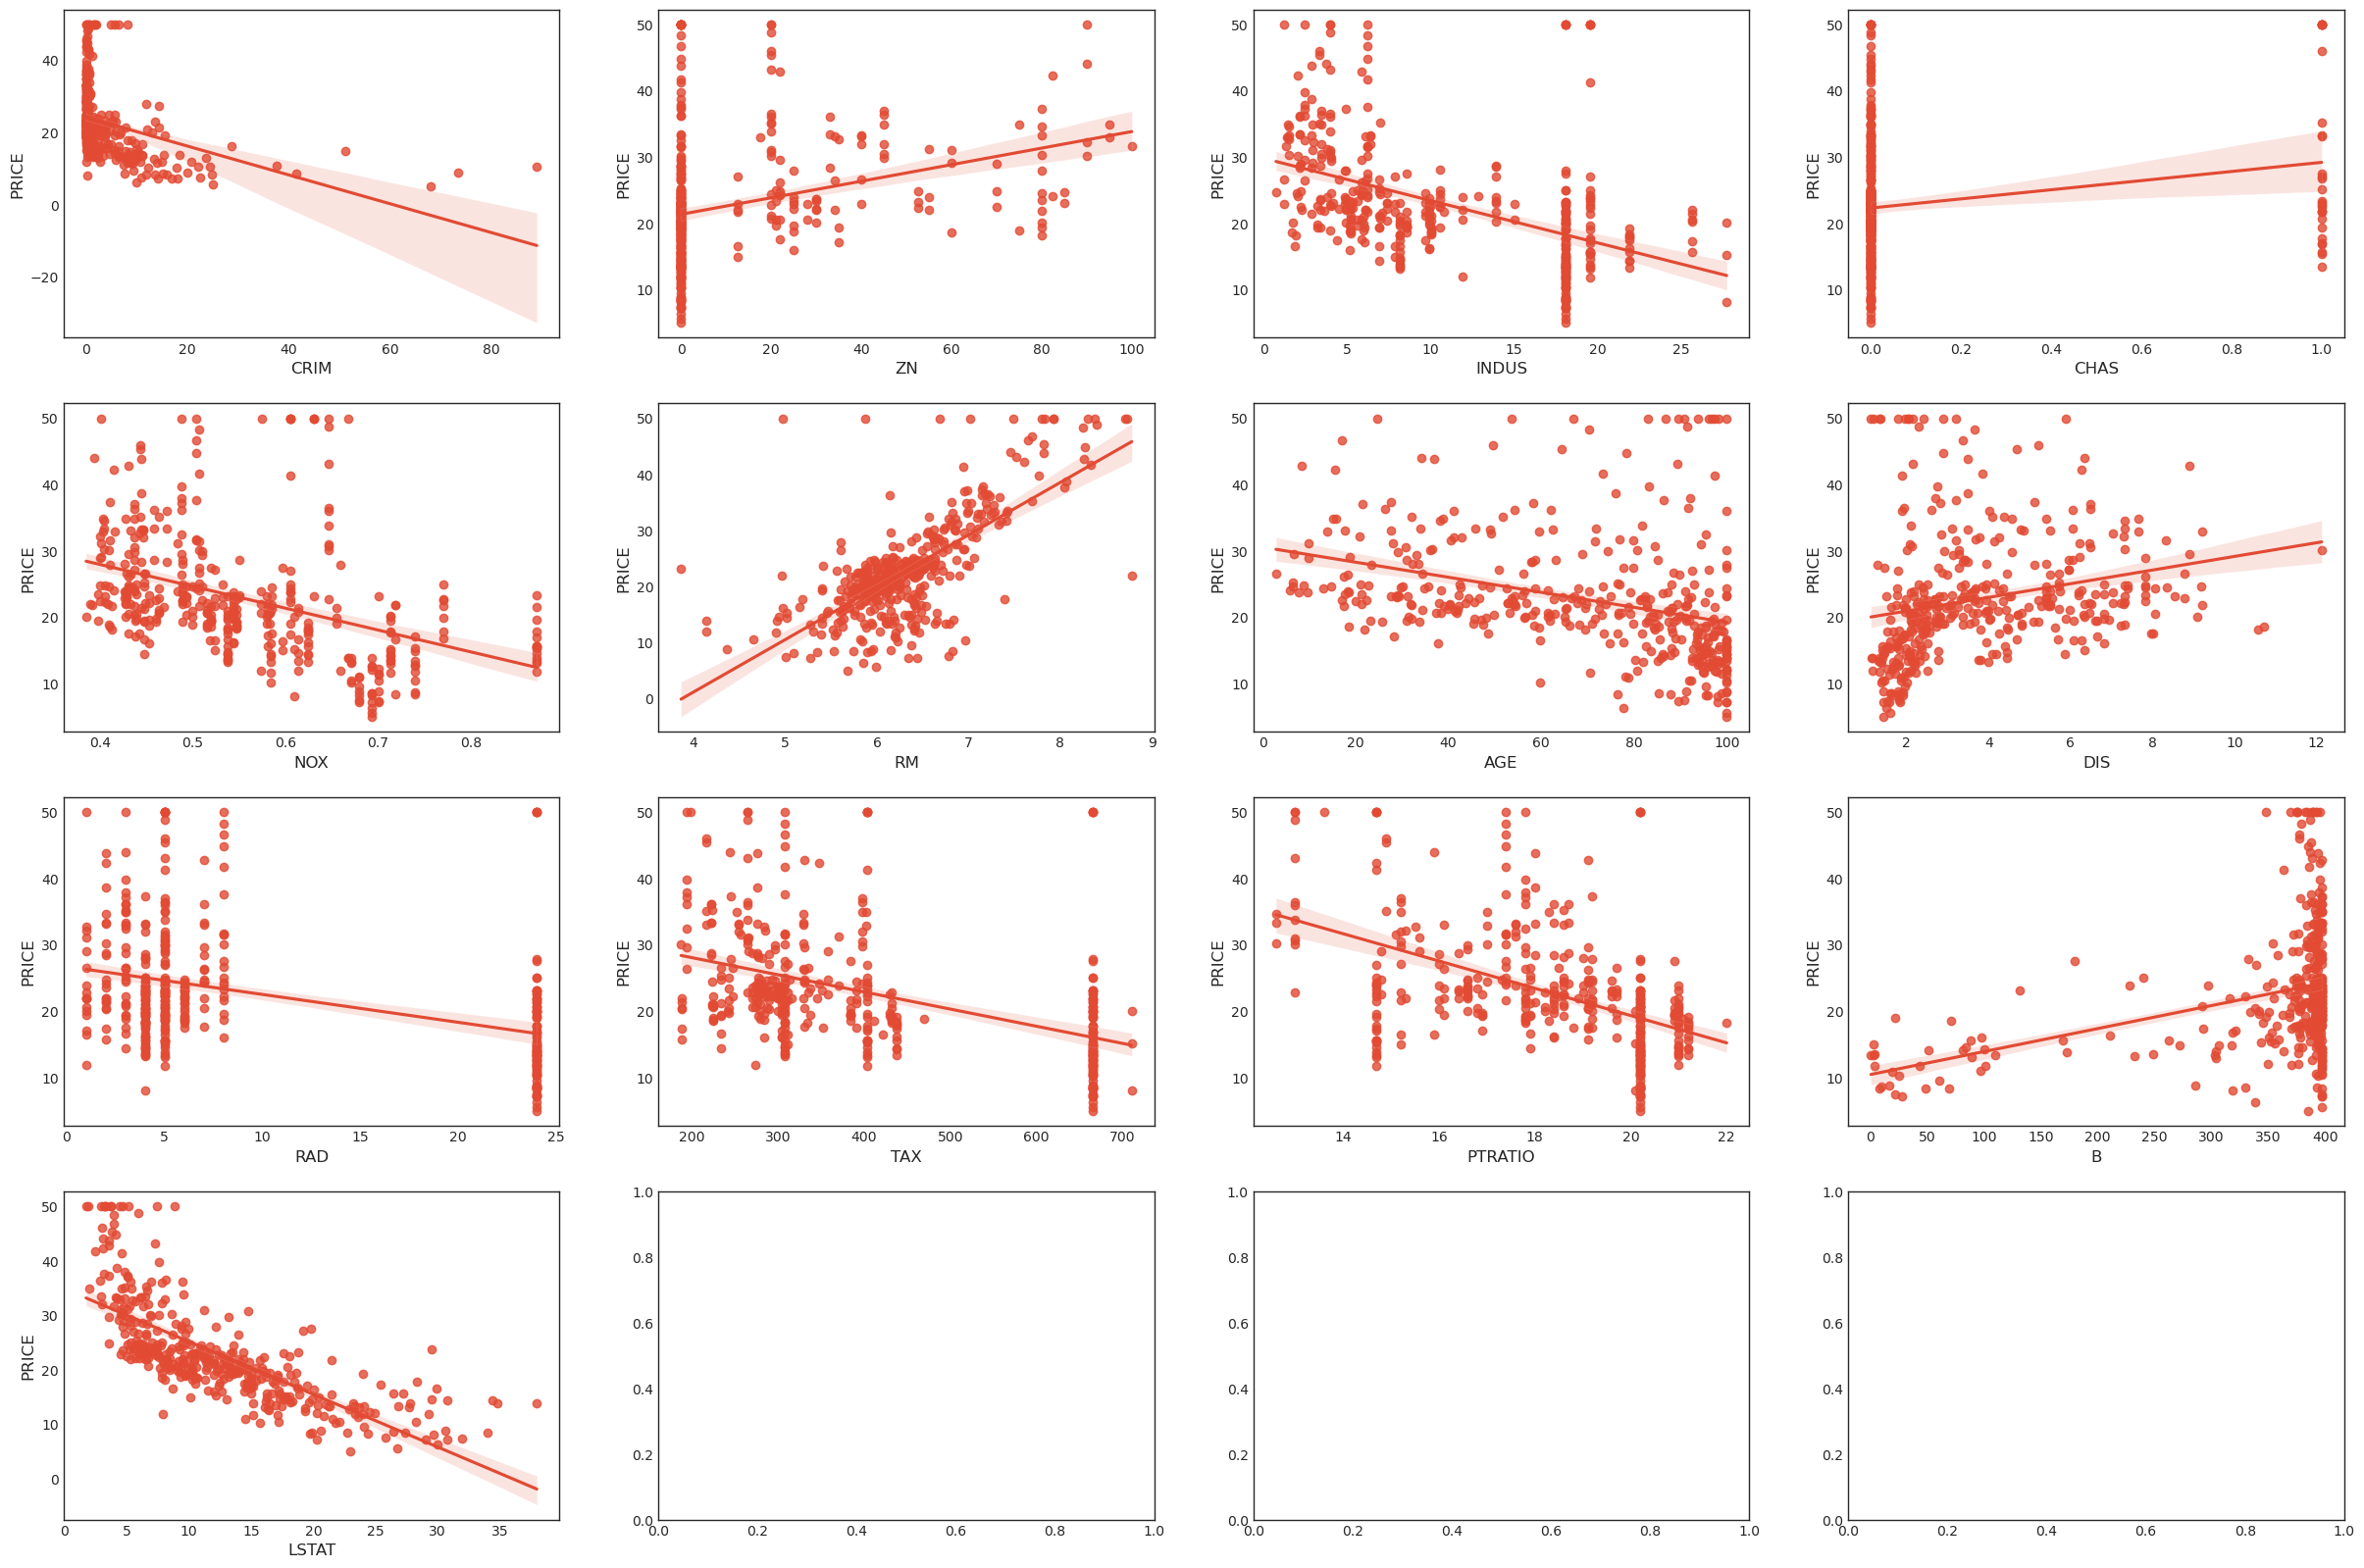

In [51]:
fig,axs = plt.subplots(figsize=(30,20),ncols=4,nrows=4)
lm_features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

for i,feature in enumerate(lm_features):
    row=int(i/4)    
    col=i%4

    sns.regplot(x=feature,y='PRICE',data=pd_train,ax=axs[row][col])


<AxesSubplot:>

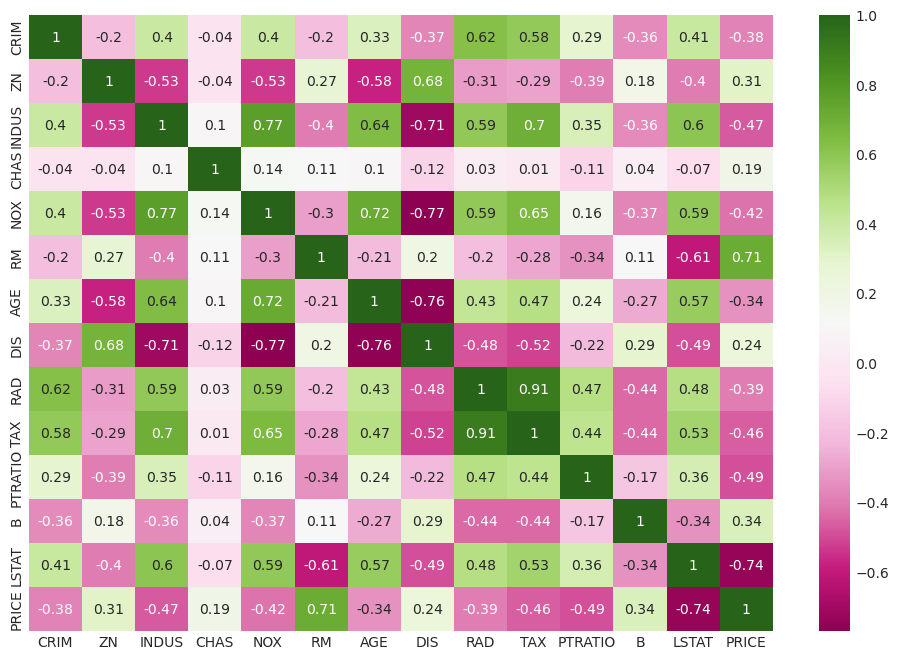

In [52]:
correlation_matrix = pd_train.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap="PiYG")

In [53]:
## scale only the training data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x_train)
# train_x = scaler.transform(x_train)

# val_x = scaler.transform()
# test = scaler.transform()

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score

def cross_val_score_model(model, x, y):
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    # print(f'Negative MSE scores : {np.round(neg_mse_scores, 2)}')
    # print(f'RMSE scores : {np.round(rmse_scores, 2)}')
    print(f'Avg RMSE : {avg_rmse:.3f}')
    return avg_rmse

In [61]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

start = datetime.now()
lin_model.fit(x_train, y_train)
finish = datetime.now()
original_elapsed_time = (finish-start).total_seconds()
print(f"elapsed time: {original_elapsed_time}")
# percentage increase
# increase = original_elapsed_time/elapsed - 1
# print(f"faster by {increase} percent")


y_pred = lin_model.predict(x_test)

o_avg_rmse = cross_val_score_model(lin_model, x_test, y_test)

elapsed time: 0.002388
Avg RMSE : 4.964


# Regression model을 고르는 방법에 대해서 읽고 안 것 정리
https://statisticsbyjim.com/regression/choosing-regression-analysis/

> There are numerous types of regression models that you can use. This choice often depends on the kind of data you have for the dependent variable and the type of model that provides the best fit.

**당연하겠지만, "데이터에 따라서 알맞게 골라야한다"고한다.**


## data가 continuous variable이라면 일단 linear regression 고를 수 있다. 

> However, OLS has several weaknesses, including a sensitivity to both `outliers` and `multicollinearity`, and it is prone to overfitting. To address these problems, statisticians have developed several advanced variants: `Ridge regression`, `Lasso regression`, `Partial least squares regression`.

* Ridge regression 
    * even when severe multicollinearity is present and helps prevent overfitting
* Lasso regression 
    * performs variable selection that aims to increase prediction accuracy by identifying a simpler model
    * automatic variable selection방식임
* Partial least squares (PLS) regression
    * when you have very few observations compared to the number of independent variables or when your independent variables are highly correlated.
    * PCA같은 효과가 이미 들어간 모델

> My advice is to fit a model using linear regression first and then determine whether the linear model provides an adequate fit by checking the residual plots. If you can’t obtain a good fit using linear regression, then try a nonlinear model because it can fit a wider variety of curves. I always recommend that you try OLS first because it is easier to perform and interpret.

Linear Model을 사용한 후에 다른 모델들을 시도해보아라


## 이제는 data가 categorical variables인 경우이다. 

> Logistic regression transforms the dependent variable and then uses Maximum Likelihood Estimation, rather than least squares, to estimate the parameters.

**이럴 때는 Logistic regression을 써보아라**


* Binary Logistic Regression
    * only two ouput classes: Yes, No; True, False; 0, 1, etc
* Ordinal Logistic Regression
    * An ordinal response has at least three groups which have a natural order, such as hot, medium, and cold.
* Nominal Logistic Regression
    *  A nominal variable has at least three groups which do not have a natural order, such as scratch, dent, and tear.


## data가 Count Dependent Variables인 경우에는

> If your dependent variable is a count of items, events, results, or activities, you might need to use a different type of regression model. Counts are nonnegative integers (0, 1, 2, etc.). Count data with higher means tend to be normally distributed and you can often use OLS. However, count data with smaller means can be skewed, and linear regression might have a hard time fitting these data. For these cases, there are several types of models you can use.

**count하는 것일 지라도 mean이 높냐, 낮냐에 따라서 또 다를 수 있다고함.**

* Poisson regression
    * Count data frequently follow the Poisson distribution, which makes Poisson Regression a good possibility.
    * Poisson models are similar to logistic models because they use Maximum Likelihood Estimation and transform the dependent variable using the natural log.
* Negative binomial regression
    * Poisson regression assumes that the variance equals the mean. When the variance is greater than the mean, your model has overdispersion.
* Zero-inflated models
    *  Your count data might have too many zeros to follow the Poisson distribution. In other words, there are more zeros than Poisson regression predicts.
    * Zero-inflated models assume that two separate processes work together to produce the excessive zeros. One process determines whether there are zero events or more than zero events. The other is the Poisson process that determines how many events occur, some of which can be zero.
    * Suppose park rangers count the number of fish caught by each park visitor as they exit the park. A zero-inflated model might be appropriate for this scenario because there are two processes for catching zero fish:
        * Some park visitors catch zero fish because they did not go fishing.
        * Other visitors went fishing, and some of these people caught zero fish.
